In [2]:
import pyforest
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [4]:
data=pd.read_csv('crime_data.csv')
data.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_data=data.rename({'Unnamed: 0':'places'},axis=1)

In [6]:
crime_data.head()

,places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
# Normalising the data

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
crime_norm = norm_func(crime_data.iloc[:,1:])
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Hierarchical Clustering

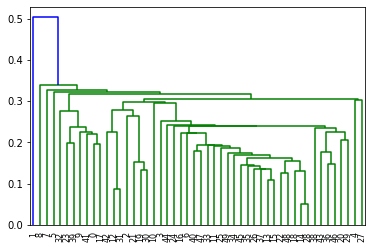

In [13]:
# creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [14]:
# Creating 4 clusters with single linkage
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [15]:
# Predicting clusters for our data
y_hc = hc.fit_predict(crime_norm)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
crime_data['h_clusterid'] = hc.labels_

In [53]:
crime_data.head()

,places,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [19]:
crime_data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.619149,163.87234,65.468085,20.625532
1,1,5.900000,238.00000,72.000000,15.800000
2,2,15.400000,335.00000,80.000000,31.900000
3,3,10.000000,263.00000,48.000000,44.500000


In [51]:
clust=crime_data["h_clusterid"].value_counts().rename_axis('cluster').reset_index(name='places')
clust

,cluster,places
0,0,47
1,3,1
2,2,1
3,1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

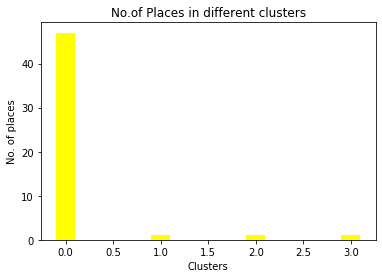

In [50]:
plt.bar(clust['cluster'],clust['places'], color ='yellow',
        width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("No. of places")
plt.title("No.of Places in different clusters")
plt.show()

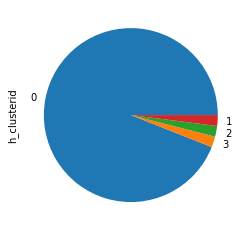

In [27]:
crime_data.h_clusterid.value_counts().plot(kind="pie")

### Inferences

1. Large no.of places are falling in cluster '0' 

2. The places which are falling in cluster '0' are with average population of 65 and having low    Assault rate(avg of 163) 

3. Places with high population with high Murder rate and Assault rate are falling in cluster '2'



# K means clustering

In [ ]:
# Finding no.of clusters by Elbow Method

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

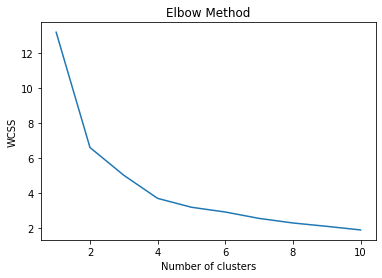

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Creating 4 clusters

In [59]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(crime_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [60]:
clusters_new.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [61]:
crime_data['kmeans_cluster'] = clusters_new.labels_

In [ ]:
# Clustering of Kmeans and  Hierarchical 

In [62]:
crime_data.head()

,places,Murder,Assault,UrbanPop,Rape,h_clusterid,kmeans_cluster
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,3,3
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,3


In [72]:
clust2=crime_data["kmeans_cluster"].value_counts().rename_axis('cluster').reset_index(name='places')
clust2

,cluster,places
0,0,17
1,2,13
2,3,12
3,1,8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

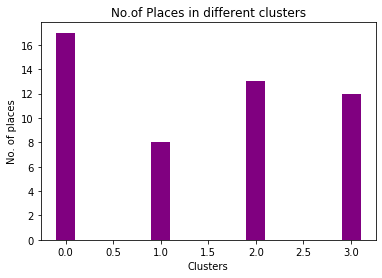

In [87]:

plt.bar(clust2['cluster'],clust2['places'], color ='purple',
        width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("No. of places")
plt.title("No.of Places in different clusters")
plt.show()

In [66]:
kmeans = pd.DataFrame(clusters_new.labels_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

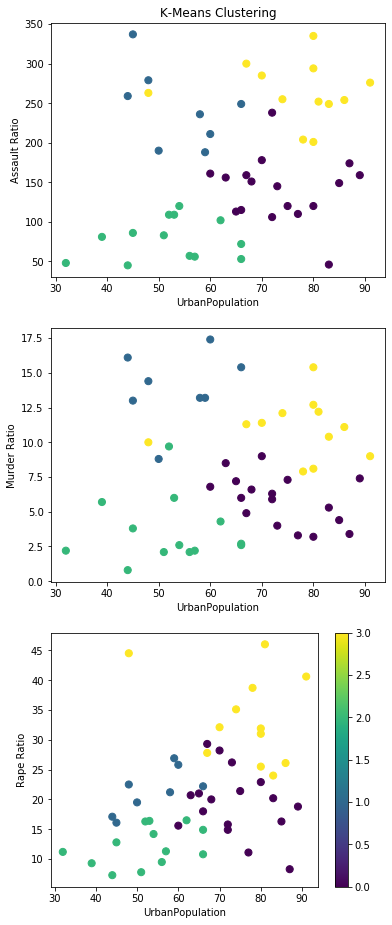

In [69]:

fig, axs = plt.subplots(3,1)

plt.subplots_adjust(top=5)
plt.subplots_adjust(bottom=2)
a=axs[0]
b=axs[1]
c=axs[2]

scatter=a.scatter(crime_data['UrbanPop'],crime_data['Assault'],c=kmeans[0],s=50)
scatter2=b.scatter(crime_data['UrbanPop'],crime_data['Murder'],c=kmeans[0],s=50)
scatter3=c.scatter(crime_data['UrbanPop'],crime_data['Rape'],c=kmeans[0],s=50)

a.set_title('K-Means Clustering')
a.set_xlabel('UrbanPopulation')
a.set_ylabel('Assault Ratio')
b.set_xlabel('UrbanPopulation')
b.set_ylabel('Murder Ratio')
c.set_xlabel('UrbanPopulation')
c.set_ylabel('Rape Ratio')
plt.colorbar(scatter)

In [ ]:
# Groping data with respect to theier clusters

In [70]:
crime_data.groupby('kmeans_cluster').agg(['mean']).reset_index()

,kmeans_cluster,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.852941,141.176471,73.647059,19.335294,0.058824
1,1,13.937500,243.625000,53.750000,21.412500,0.000000
2,2,3.600000,78.538462,52.076923,12.176923,0.000000
3,3,10.966667,264.000000,76.500000,33.608333,0.416667


In [71]:
crime_data["kmeans_cluster"].value_counts()

0    17
2    13
3    12
1     8
Name: kmeans_cluster, dtype: int64

###   Inferences

1. We have divided the data into 4 clusters 
2. Even if the places in cluster '0' are having high population the crime rate is moderate in those cities.so we can say the Public security in those cities is having better priority than places in cluster '3'.Places in cluster '0' is better than places in cluster '3'
3. The places in cluster '1' are having 2nd lowest population (approx 53) but the crime rate is comparatively high.So,the pubic safety is bad at those places 
4. From above we can see the places with low population and minimum murder rate,assault rate and rape rate are falling in cluster '2'.so , we can say the places in cluster '2' are having low crime rate and they are safe .
5. Places with high population and with high crime rate (assault,murder,rape) are falling in cluster '3'.so the places in cluster '3' are not safe.
6. Finally the places in cluster '3' and cluster '1' are having high crime rate than compared with places in cluster '0' and cluster '2'

# DBSCAN Clustering

In [ ]:
# Appling DBscan clustering with epsilon radius of 0.3 and min points as 5

In [79]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(crime_norm)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [80]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [81]:
crime_data['DBSCAN_cluster'] = dbscan.labels_

In [82]:
crime_data

,places,Murder,Assault,UrbanPop,Rape,h_clusterid,kmeans_cluster,DBSCAN_cluster
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,3,3,-1
2,Arizona,8.1,294,80,31.0,0,3,-1
3,Arkansas,8.8,190,50,19.5,0,1,1
4,California,9.0,276,91,40.6,0,3,-1
5,Colorado,7.9,204,78,38.7,0,3,-1
6,Connecticut,3.3,110,77,11.1,0,0,1
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,2,3,-1
9,Georgia,17.4,211,60,25.8,0,1,0


In [ ]:
# The data is divinded into 3 clusters

In [83]:
clust3=crime_data["DBSCAN_cluster"].value_counts().rename_axis('cluster').reset_index(name='places')
clust3

,cluster,places
0,1,31
1,-1,14
2,0,5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

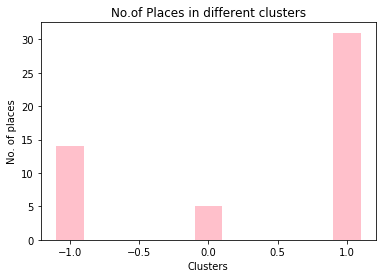

In [84]:
plt.bar(clust3['cluster'],clust3['places'], color ='pink',
        width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("No. of places")
plt.title("No.of Places in different clusters")
plt.show()

In [30]:
crime_data.groupby('DBSCAN cluster').agg(['mean']).reset_index()

,DBSCAN cluster,Murder,Assault,UrbanPop,Rape,h_clusterid,kmeans_cluster
,,mean,mean,mean,mean,mean,mean
0,-1,10.992857,271.500000,71.357143,30.485714,0.428571,2.500000
1,0,14.720000,232.600000,58.200000,23.720000,0.000000,1.000000
2,1,5.222581,115.290323,64.096774,16.651613,0.000000,0.967742


### Inferences

1. The data is divided into 3 clusters.
2. In Cluster '-1' places are with high population and high crime rate.
3. In cluster '0' places are with low population and high crime rate.
4. In cluster '1' places are with moderate population and low crime rate. 
5. Finally we can say cluster '1' places are safe than other places.

In [89]:
# Dataset clasified with diffirent types of clustering and their respective clusters

In [88]:
crime_data

,places,Murder,Assault,UrbanPop,Rape,h_clusterid,kmeans_cluster,DBSCAN_cluster
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,3,3,-1
2,Arizona,8.1,294,80,31.0,0,3,-1
3,Arkansas,8.8,190,50,19.5,0,1,1
4,California,9.0,276,91,40.6,0,3,-1
5,Colorado,7.9,204,78,38.7,0,3,-1
6,Connecticut,3.3,110,77,11.1,0,0,1
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,2,3,-1
9,Georgia,17.4,211,60,25.8,0,1,0
